[0.04689072 0.93449271 0.02599288 1.         0.41140266 0.58014588
 0.79107237 0.45245783 0.14924177 0.        ]
[[5 0]]
0
5
5
5
2
8
5
5
5
5
5
5
5
5
5
4
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
6
3
3
3
3
8.742574257425742


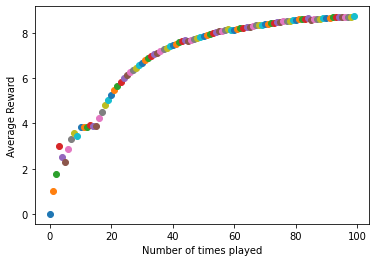

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def reward(prob):
    reward = 0
    for i in range(10):
        if np.random.rand(1) < prob:
            reward += 1
    return reward

#greedy method to select best arm based on memory array
def bestArm(a):
    bestArm = 0 #default to 0
    bestMean = 0
    for u in a:
        avg = np.mean(a[np.where(a[:,0] == u[0])][:, 1]) #calculate mean reward for each action
        if bestMean < avg:
            bestMean = avg
            bestArm = u[0]
    return bestArm

#Main program

#Init
np.random.seed(5)
n = 10 #number of arms
arms = np.random.rand(n)
arms = (arms - arms.min()) / (arms.max() - arms.min()) #normalization
eps = 0.1 #probability of exploration action
print(arms)

#initialize memory array; has 1 row defaulted to random action index
av = np.array([np.random.randint(0,(n+1)), 0]).reshape(1,2) #av = action-value
print(av)

plt.xlabel("Number of times played")
plt.ylabel("Average Reward")
for i in range(100):    
    if np.random.rand(1) > eps: #greedy exploitation action
        choice = bestArm(av)
        print(choice)
        thisAV = np.array([[choice, reward(arms[choice])]])
        av = np.concatenate((av, thisAV), axis=0)
    else: #exploration action
        choice = np.where(arms == np.random.choice(arms))[0][0]
        print(choice)
        thisAV = np.array([[choice, reward(arms[choice])]]) #choice, reward
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)
print(runningMean)


